In [66]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

In [67]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd

In [68]:
mod = KNeighborsRegressor().fit(X, y)

pipe = Pipeline([
    ("Scale" , StandardScaler()),
    ("model" , KNeighborsRegressor(n_neighbors = 1))
])
pipe.get_params()

{'memory': None,
 'steps': [('Scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'Scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'Scale__copy': True,
 'Scale__with_mean': True,
 'Scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [69]:
pipe.fit(X, y)

Pipeline(steps=[('Scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

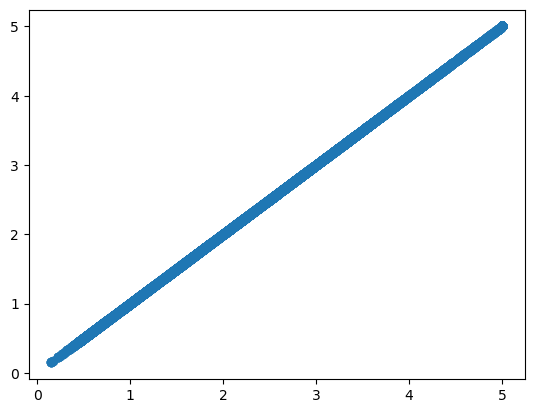

In [70]:
pipe.predict(X)
plt.scatter(pipe.predict(X), y)

In [71]:
mod = GridSearchCV(estimator = pipe,
             param_grid = {'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]} ,
             cv=3)

In [73]:
mod.fit(X, y);
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030461,0.003908,0.837058,0.079906,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.040141,0.005823,0.947443,0.081766,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.041767,0.005011,1.015897,0.077575,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.035969,0.008101,1.092023,0.091549,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.045471,0.008155,1.141858,0.079589,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.037339,0.007575,1.164748,0.092231,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.041728,0.007418,1.188286,0.097989,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.039124,0.006476,1.060558,0.236280,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.032025,0.006429,1.273075,0.086580,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.029584,0.009896,0.974722,0.392964,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


In [74]:
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived